In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last = session.query(Measurement.date).order_by(Measurement.id.desc()).first()
print(last)

past_12_mo = dt.datetime.strptime('2017-08-23', "%Y-%m-%d") - dt.timedelta(days=365)
print(past_12_mo)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

for row in results:
    print(row)
    

('2017-08-23',)
2016-08-23 00:00:00
('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016

('2016-10-30', 0.1)
('2016-10-31', 0.03)
('2016-11-01', 0.01)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.02)
('2016-11-06', 0.02)
('2016-11-07', 0.0)
('2016-11-08', 0.14)
('2016-11-09', 0.08)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.06)
('2016-11-15', 0.0)
('2016-11-16', 0.14)
('2016-11-17', 0.03)
('2016-11-18', 0.01)
('2016-11-19', 0.11)
('2016-11-20', 0.11)
('2016-11-21', 0.02)
('2016-11-22', 0.41)
('2016-11-23', 0.03)
('2016-11-24', 0.2)
('2016-11-25', 0.05)
('2016-11-26', 0.05)
('2016-11-27', 0.06)
('2016-11-28', 0.02)
('2016-11-29', 0.04)
('2016-11-30', 0.05)
('2016-12-01', 0.33)
('2016-12-02', 0.3)
('2016-12-03', 0.04)
('2016-12-04', 0.1)
('2016-12-05', 0.34)
('2016-12-06', 0.02)
('2016-12-07', 0.17)
('2016-12-08', 0.03)
('2016-12-09', 0.34)
('2016-12-10', 0.02)
('2016-12-11', 0.02)
('2016-12-12', 0.01)
('2016-12-13', 0.1)
('2016-12-14', 0.05)
('2016-12-15', 0.02)
('2016-12-16', 0.01)
('2016

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
sql_df = pd.read_sql("SELECT date, prcp FROM measurement WHERE date>= '2016-08-23'", conn)
sql_df.rename(columns={'prcp':'precipitation'}, inplace=True)
date_index_df = sql_df.set_index('date')


# Sort the dataframe by date
date_index_df.sort_index(axis=0, ascending=True, inplace=True)
date_index_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


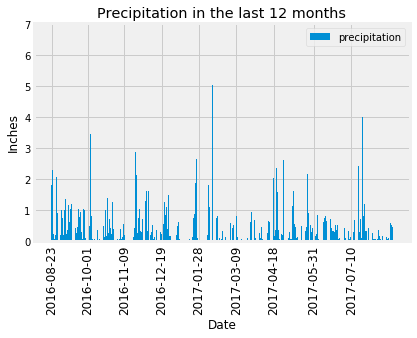

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
xticks=["2016-08-23", "2016-10-01", "2016-11-09","2016-12-19", "2017-01-28", "2017-03-09",\
        "2017-04-18", "2017-05-31", "2017-07-10"]

plt.bar(date_index_df.index, date_index_df["precipitation"], label="precipitation")
plt.legend(loc="best")
plt.title("Precipitation in the last 12 months")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(ticks=xticks, labels= xticks, rotation=90, fontsize=12)

plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_index_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?

session.query(Measurement.station).group_by(Measurement.station).count()

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(results)



[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 0, 'Temperature')

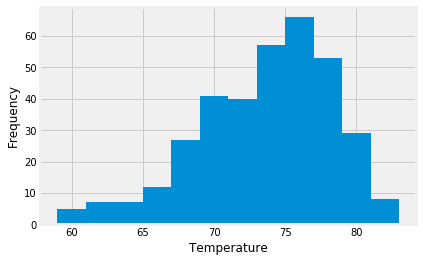

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date >= '2016-08-23').filter(Measurement.station == "USC00519281").all()

temp_obs_df = pd.DataFrame(temp_obs, columns=['date', 'tobs'])
temp_obs_df.set_index('date', inplace=True)


plt.hist(temp_obs_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
